# sklearn_classification_models_for_seasonal_selections

https://www.projectpro.io/article/multi-class-classification-python-example/547#mcetoc_1fpjsn4g8g

https://www.educba.com/keras-sequential/

###### Load modules 

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [165]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

In [131]:


# %matplotlib inline
# import sklearn
# import pandas as pd
# pd.set_option('display.float_format', '{:.2f}'.format)
# import numpy as np
# from random import sample
# from sklearn.ensemble import RandomForestRegressor as rfr
# from sklearn.ensemble import ExtraTreesRegressor as etr
# from sklearn.ensemble import GradientBoostingRegressor as gbr
# from sklearn.ensemble import AdaBoostRegressor as abr
# from sklearn.tree import DecisionTreeRegressor as dtr
# import matplotlib.pyplot as plt
# import csv
# from sklearn.model_selection import train_test_split

# # import plotting and stats modules

# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import scipy
# import scipy.stats as sc
# import numpy as np
# from glob import glob

# # stats module
# import statsmodels.api as sm
# from statsmodels.tools.tools import add_constant
# from statsmodels.sandbox.regression.predstd import wls_prediction_std
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# from bokeh.io import output_notebook, output_file
# from bokeh.plotting import figure, show, save
# #%matplotlib inline

# # Bokeh Libraries
# # from bokeh.plotting import figure, show
# # from bokeh.io import output_file
# from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


# from sklearn.model_selection import cross_validate
# #sklearn.model_selection.cross_validate
# # from sklearn import cross_validation
# from sklearn.metrics import explained_variance_score
# from sklearn import metrics
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# #from sklearn.cross_validation import KFold
# import pickle5 as Pickle

In [3]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
date_str = now.strftime("%Y%m%d")
date_time_str = now.strftime("%Y%m%d_%H%M%S")
print(date_str)
print(date_time_str)

20230205
20230205_172204


### Import data

In [4]:
#date_str = "20230201"
drive = "F"
data_date = "20230205"
# define output directory
output_dir = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date_str)
export_dir = os.path.join(output_dir, date_time_str)

# data dir
dir_ = r"{0}:\cdu\data\zonal_stats\output\{1}\ml_data_si_dir".format(drive, data_date)

index_ = 1


In [12]:
def mk_dir_fn(dir_):
    """ Create a new directory if one does not already exist. """
    print("pathway ", dir_)
    if not os.path.isdir(dir_):
        os.mkdir(dir_)

        
def export_csv_fn(list_, dir_, file_name):
    
    """ Create and export path from directory and file name and exports csv with no dropping the index column. """
    
    df_final = pd.concat(list_, axis =0)    
    output_path = os.path.join(dir_, file_name)
    df_final.to_csv(os.path.join(output_path), index=False)
    print("File output to: ", output_path)
    
    return df_final

## Set output file locations

## Load data

In [13]:
file_list = []
for f in glob(os.path.join(dir_, "*class.csv")):
    print(f)
    file_list.append(f)


F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std__fnm_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std__fnm_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_NOT_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\s_mean_max_min_med_std_met_fnm_fms_si_class.csv
F:\cdu\data\zonal_stats\output\20230205\ml_data_si_dir\r2_bs_mean_max_min_med_std_met_fnm_fms_si_class.csv


In [14]:
_, file_name = os.path.split(file_list[index_])
split_list = file_name.split(".")
data_set = split_list[0]

In [15]:
data_set

'r2_bs_mean_max_min_med_std__fnm_fms_si_class'

In [18]:
ml_rf_reg_dir= os.path.join(output_dir, "ml_svc_class_dir")
data_set_dir= os.path.join(ml_rf_reg_dir, "data_set")
export_ml_rf_reg_dir = os.path.join(data_set_dir, date_time_str)
# plots_dir = os.path.join(export_ml_rf_reg_dir, data_set)
all_plots_dir = os.path.join(export_ml_rf_reg_dir, "all_plots")
# no_tern_plots_dir = os.path.join(plots_dir, "no_tern")


In [19]:
# mk_dir_fn(output_dir)
mk_dir_fn(ml_rf_reg_dir)
mk_dir_fn(data_set_dir)
mk_dir_fn(export_ml_rf_reg_dir)
# mk_dir_fn(plots_dir)
mk_dir_fn(all_plots_dir)
# mk_dir_fn(no_tern_plots_dir)

pathway  F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir
pathway  F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir\data_set
pathway  F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir\data_set\20230205_172204
pathway  F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir\data_set\20230205_172204\all_plots


In [20]:
export_ml_rf_reg_dir

'F:\\cdu\\data\\zonal_stats\\output\\20230205\\ml_knn_class_dir\\data_set\\20230205_172204'

In [21]:
df = pd.read_csv(file_list[index_], header=0)

In [22]:
df

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,8,ntadac0002,79,20160506,15.54,42.39,29.12,29.27,6.84,16.05,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,9,ntaarp0001,75,20160602,27.61,38.92,34.75,34.33,3.24,17.31,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,8,ntaarp0002,76,20160602,9.06,22.31,14.40,14.21,3.60,9.74,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,ntaarp0003,77,20160603,5.26,25.45,13.08,12.11,5.79,9.61,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


slope:  1.7911862699200679e-06
intersept:  6.367735716719092
r2:  0.3764617375841587
P_value:  5.327552093824704e-07
std error:  3.4315597327307624e-07


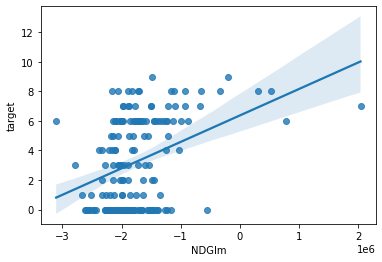

In [25]:
value_y = 'target'
value_x = 'NDGIm'
sns.regplot(x= value_x, y=value_y, data=df)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df[value_x], df[value_y])

print("slope: ", slope)
print("intersept: ", intercept)
print("r2: ", r_value)
print("P_value: ", p_value)
print("std error: ", std_err)

In [34]:
df_ml = df.copy(deep=True)

### Set variables to plot

## Choose which data set to run the models from

In [35]:
df_ml.head(5)

,target,site,uid,date,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,nt001,71,20110523,13.78,47.00,25.85,23.87,8.48,7.27,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,barkely01,24,20111025,0.75,2.87,1.69,1.49,0.70,4.38,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,barkely04,27,20111026,2.12,6.42,4.37,4.47,1.22,5.93,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,barkely03,26,20111026,0.75,3.29,1.82,1.64,0.70,3.66,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,barkely02,25,20111026,2.12,13.78,4.97,4.73,2.43,3.13,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007


In [37]:
# drop some of the unwanted values
df_ml.drop(['site', 'uid', 'date'], axis=1, inplace=True) # 'date',
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

In [38]:
df_ml

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
0,0,13.78,47.00,25.85,23.87,8.48,7.27,11.78,9.24,8.86,...,-1797183,1797183,803085,-1648544,1653000,2108509,1334000,2374229,3891482,5080174
1,0,0.75,2.87,1.69,1.49,0.70,4.38,8.97,6.83,7.18,...,-1237840,1237840,145478,-1258856,1100000,1063379,731000,1207466,1791228,1985065
2,0,2.12,6.42,4.37,4.47,1.22,5.93,8.85,7.68,7.68,...,-1493838,1493838,965693,-982236,1174000,951763,677000,1068835,1504110,1636492
3,0,0.75,3.29,1.82,1.64,0.70,3.66,7.09,4.98,4.85,...,-1481481,1481481,-2046,-1713026,1178000,1068186,738000,1210101,1779171,1970149
4,0,2.12,13.78,4.97,4.73,2.43,3.13,5.82,4.55,4.43,...,-1563211,1563211,758167,-969300,1320000,1195078,839000,1339257,1908119,2131007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,8,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
163,9,27.61,38.92,34.75,34.33,3.24,17.31,21.59,19.37,19.22,...,-1485714,1485714,4017258,1123510,1746000,2727661,1590000,3059261,5686695,9070438
164,8,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


## Qty of 0 values dataset 

In [84]:
model_data = df_ml
model_data_name = "all_values"

# ## Filter out all taregt == 0 values
model_data = df_ml[df_ml['target']>0]
model_data_name = "no0_values"

# ## Filter out all taregt == 0 values
model_data = df_ml[(df_ml['target']>0) & (df_ml['target']!=9)]
model_data_name = "no0or9_values"


# ## Select a randon number of 0 values
# n = 3
# agb_0 = df_ml[df_ml['target']==0.0].sample(n)
# model_data = pd.concat([df_ml[df_ml['target']>0.0], agb_0])
# model_data_name = f"s{n}_0_values"


model_outputs = os.path.join(export_ml_rf_reg_dir, f"{model_data_name}")
mk_dir_fn(model_outputs)

print(model_outputs)

pathway  F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir\data_set\20230205_172204\no0or9_values
F:\cdu\data\zonal_stats\output\20230205\ml_knn_class_dir\data_set\20230205_172204\no0or9_values


In [87]:
model_data.target.value_counts()

6    32
8    13
3    12
7    12
1    12
4    10
2     9
5     8
Name: target, dtype: int64

In [88]:
model_data.dropna(inplace=True)

C:\Users\rmcgr\AppData\Local\Temp\ipykernel_21320\3310783176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data.dropna(inplace=True)


In [89]:
model_data

,target,b1_fpca2_0509_min,b1_fpca2_0509_max,b1_fpca2_0509_mean,b1_fpca2_0509_med,b1_fpca2_0509_std,b1_h99a_01122_min,b1_h99a_01122_max,b1_h99a_01122_mean,b1_h99a_01122_med,...,NDGIm,RIm,NBRm,NDIIm,GDVIm,MSAVIm,DVIm,SAVIm,NDVIm,MSRm
5,2,1.79,5.83,2.86,2.48,1.22,3.80,5.20,4.29,4.27,...,-1452928,1452928,400174,-1264158,1238000,1250407,846000,1420098,2149390,2440148
8,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2148760,2148760,-267789,-1724138,1148000,1156438,732000,1358238,2373541,2737539
9,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2327297,2327297,176162,-1318945,1571000,1235708,877000,1377054,1926203,2153802
10,5,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-2063673,2063673,799162,-701031,1106000,1197360,743000,1417038,2593368,3039489
12,2,6.80,17.20,11.25,11.00,2.80,7.44,12.23,9.75,9.73,...,-1639267,1639267,1618314,-88940,1673000,2020530,1324000,2256305,3482378,4382641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,7,19.30,27.61,23.58,23.34,2.53,15.64,19.64,18.24,18.35,...,-1222031,1222031,3647779,881563,1718000,2675640,1576000,3000000,5472222,8485610
162,8,15.54,42.39,29.12,29.27,6.84,16.05,20.42,18.75,18.77,...,-652174,652174,4386747,1261845,1828000,3096442,1768000,3422819,6433770,11466633
164,8,9.06,22.31,14.40,14.21,3.60,9.74,16.81,13.63,13.79,...,-2065698,2065698,2615783,222222,1810000,2372051,1483000,2650423,4370763,5977733
165,7,5.26,25.45,13.08,12.11,5.79,9.61,20.05,13.89,13.26,...,-1885790,1885790,2958064,395123,1691000,2284112,1407000,2574722,4401001,6037665


 Define if you are using all variabes or selected variables

In [90]:
# from sklean.model
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[["target"]].astype('int')
ydata2 = ydata1.values
ydata = ydata2.ravel()

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, train_size=0.70, stratify=ydata)  
         
#y_test.value_counts()
# print(X_test.shape, y_test.shape)

In [149]:
# Stratify the data split into train and test datasets.
# The stratify parameter will ensure that the train and test split has the same class 
# distribution ratio as the original dataset.

xdata = model_data.iloc[:, 1:].astype('float32')
ydata = model_data[["target"]].astype('int')

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, train_size=0.70, stratify=ydata)  

The stratify parameter will ensure that the train and test split has the same class distribution ratio as the original dataset. It is crucial in the case of imbalanced datasets. Otherwise, it might happen that the training data only consists of the majority class

In [92]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_text = pd.DataFrame(scaler.transform(X_test))

In [93]:
y_train.value_counts()

target
6         22
7          9
8          9
1          8
3          8
4          7
2          6
5          6
dtype: int64

Now comes the turn to handle the class imbalance. Oversampling is one of the most widely used techniques to deal with imbalance classes. To briefly explain the concept, we generate synthetic samples for minority classes to make sure we have enough data to train the model. I will be using SMOTE for oversampling. You can install imblearn module for using SMOTE

In [150]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# x_TRAIN_RES, Y_TRAIN_RES = SM.FIT_RESAMPLE(x_TRAIN, Y_TRAIN)

In [151]:
y_train_res.target.ravel()

array([6, 6, 8, 4, 6, 6, 4, 1, 1, 1, 5, 3, 1, 2, 1, 3, 6, 5, 6, 6, 3, 6,
       4, 8, 7, 6, 1, 7, 6, 8, 6, 8, 6, 1, 3, 4, 6, 6, 6, 8, 8, 8, 6, 4,
       3, 2, 5, 7, 6, 4, 7, 8, 6, 7, 5, 6, 6, 2, 6, 7, 5, 3, 3, 3, 2, 7,
       7, 5, 2, 2, 4, 8, 1, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8])

### SVC

In [152]:
model_svc = svm.SVC()

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         4
           2       0.38      1.00      0.55         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.33      0.25      0.29         4
           8       0.50      0.75      0.60         4

    accuracy                           0.27        33
   macro avg       0.28      0.31      0.26        33
weighted avg       0.26      0.27      0.24        33

Confusion matrix, without normalization
[[2 0 2 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 2 2 1 2 0 1 2]
 [0 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 1 3]]
Normalized confusion matrix
[[0.5  0.   0.5  0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]

C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


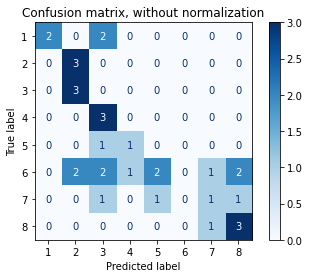

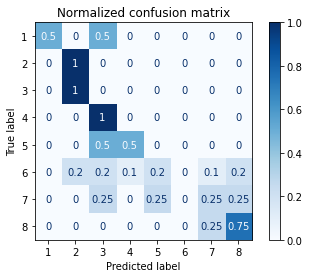

In [153]:
model_svc = svm.SVC()
model_svc .fit(X_train_res, y_train_res.target.ravel())
y_pred = model_svc.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

### Decision Tree Classifier

              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.00      0.00      0.00         3
           3       0.12      0.33      0.18         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.50      0.30      0.37        10
           7       0.33      0.25      0.29         4
           8       0.40      0.50      0.44         4

    accuracy                           0.27        33
   macro avg       0.25      0.24      0.23        33
weighted avg       0.33      0.27      0.29        33

Confusion matrix, without normalization
[[2 1 1 0 0 0 0 0]
 [0 0 1 0 0 1 0 1]
 [0 0 1 0 1 1 0 0]
 [1 0 2 0 0 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 1 1 3 1 3 1 0]
 [0 0 1 0 0 0 1 2]
 [0 0 0 0 1 1 0 2]]
Normalized confusion matrix
[[0.5    0.25   0.25   0.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.     0.     0.3333 0.     0.3333]
 [0.     0

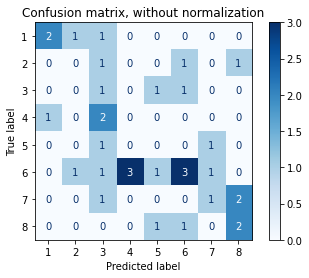

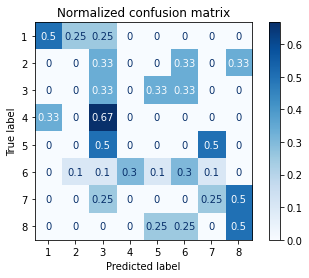

In [174]:
model = DecisionTreeClassifier(class_weight='balanced', max_depth=10)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Random Forest Classifier

              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       0.50      0.33      0.40         3
           3       0.29      0.67      0.40         3
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         2
           6       0.67      0.20      0.31        10
           7       0.50      0.25      0.33         4
           8       0.44      1.00      0.62         4

    accuracy                           0.45        33
   macro avg       0.46      0.48      0.42        33
weighted avg       0.52      0.45      0.42        33

Confusion matrix, without normalization
[[3 1 0 0 0 0 0 0]
 [0 1 1 0 0 1 0 0]
 [0 0 2 1 0 0 0 0]
 [1 0 0 2 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 3 0 1 2 1 3]
 [0 0 0 0 1 0 1 2]
 [0 0 0 0 0 0 0 4]]
Normalized confusion matrix
[[0.75   0.25   0.     0.     0.     0.     0.     0.    ]
 [0.     0.3333 0.3333 0.     0.     0.3333 0.     0.    ]
 [0.     0

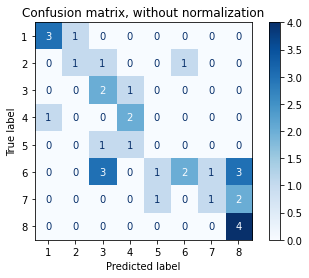

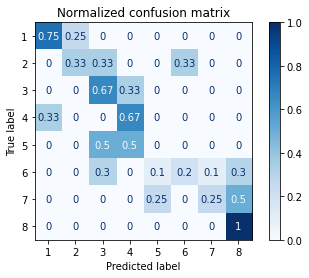

In [175]:
model = RandomForestClassifier(class_weight='balanced', random_state=1,max_depth=5, \
                              n_estimators =10, max_features=1)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## KNN

              precision    recall  f1-score   support

           1       0.67      0.50      0.57         4
           2       0.50      0.33      0.40         3
           3       0.25      0.67      0.36         3
           4       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         2
           6       1.00      0.20      0.33        10
           7       0.00      0.00      0.00         4
           8       0.40      1.00      0.57         4

    accuracy                           0.36        33
   macro avg       0.38      0.38      0.32        33
weighted avg       0.52      0.36      0.33        33

Confusion matrix, without normalization
[[2 0 2 0 0 0 0 0]
 [0 1 1 0 0 0 0 1]
 [0 0 2 0 0 0 0 1]
 [0 0 2 1 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [1 1 1 1 1 2 2 1]
 [0 0 0 1 0 0 0 3]
 [0 0 0 0 0 0 0 4]]
Normalized confusion matrix
[[0.5    0.     0.5    0.     0.     0.     0.     0.    ]
 [0.     0.3333 0.3333 0.     0.     0.     0.     0.3333]
 [0.     0

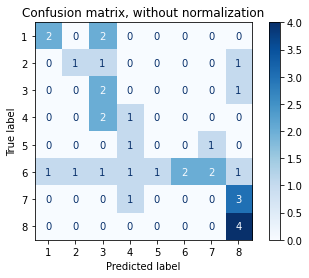

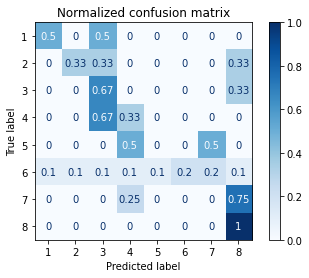

In [176]:
model = KNeighborsClassifier(3)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## AdaBoost Classifier

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.25      0.33      0.29         3
           3       0.33      0.67      0.44         3
           4       0.50      0.67      0.57         3
           5       0.00      0.00      0.00         2
           6       0.17      0.10      0.12        10
           7       0.10      0.25      0.14         4
           8       0.00      0.00      0.00         4

    accuracy                           0.21        33
   macro avg       0.17      0.25      0.20        33
weighted avg       0.16      0.21      0.17        33

Confusion matrix, without normalization
[[0 3 1 0 0 0 0 0]
 [0 1 1 0 1 0 0 0]
 [0 0 2 0 0 1 0 0]
 [0 0 1 2 0 0 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 1 2 2 1 4 0]
 [0 0 0 0 0 3 1 0]
 [0 0 0 0 0 0 4 0]]
Normalized confusion matrix
[[0.     0.75   0.25   0.     0.     0.     0.     0.    ]
 [0.     0.3333 0.3333 0.     0.3333 0.     0.     0.    ]
 [0.     0

C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


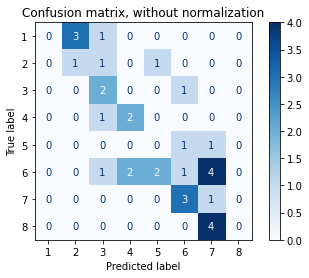

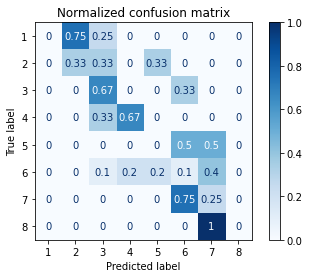

In [177]:
model = AdaBoostClassifier(learning_rate=0.01)
model .fit(X_train_res, y_train_res.target.ravel())
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

np.set_printoptions(precision=4)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Neural Networks

In [178]:
from tensorflow import keras

In [179]:
model = keras.Sequential([
    keras.layers.Dense(32, input_dim=26, activation='relu'),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dropout(0,3),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(4, activation = "softmax")
])

In [180]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [181]:
y_train_enc = pd.get_dummies(y_train_res)
y_train_enc

,target
0,6
1,6
2,8
3,4
4,6
...,...
171,8
172,8
173,8
174,8


In [184]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(y_train_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_train_res = y_train_res.join(enc_df)
y_train_res

,target,0,1,2,3,4,5,6,7
0,6,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,6,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,4,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,6,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
171,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
172,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
173,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
174,8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [190]:
enc_df = pd.DataFrame(enc.fit_transform(y_test_res[['target']]).toarray())
# merge with main df bridge_df on key values
y_test_res = y_test_res.join(enc_df)
y_test_res

NameError: name 'y_test_res' is not defined

In [185]:
y_train_res.drop("target", axis=1, inplace=True)

In [186]:
y_train_res

,0,1,2,3,4,5,6,7
0,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...
171,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
172,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
173,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
174,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [188]:
history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

Epoch 1/500


ValueError: in user code:

    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 26), found shape=(None, 170)


https://www.educba.com/keras-sequential/

In [192]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(3,))
x = tf.keras.layers.Dense(4, activation=tf.nn.relu)(inputs)
outputs = tf.keras.layers.Dense(5, activation=tf.nn.softmax)(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [193]:
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify the input shape, the model gets built
# continuously as you are adding layers:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
model.add(tf.keras.layers.Dense(4))
len(model.weights)
# Returns "4"

# When using the delayed-build pattern (no input shape specified), you can
# choose to manually build your model by calling
# `build(batch_input_shape)`:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(4))
model.build((None, 16))
len(model.weights)
# Returns "4"

# Note that when using the delayed-build pattern (no input shape specified),
# the model gets built the first time you call `fit`, `eval`, or `predict`,
# or the first time you call the model on some input data.
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='sgd', loss='mse')
# This builds the model for the first time:
model.fit(x, y, batch_size=32, epochs=10)

NameError: name 'y' is not defined

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((X_train_res, y_train_enc))
valid_data = tf.data.Dataset.from_tensor_slices((X_test_res, y_test_enc))

history = model.fit(X_train_res, y_train_enc, epochs=500, validation_split=0.2)

In [ ]:
model.fit(trainMixed, trainVocals,epochs=10, validation_data=(testMixed, testVocals))

In [189]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((trainMixed, trainVocals))
valid_data = tf.data.Dataset.from_tensor_slices((testMixed, testVocals))

model.fit(train_data, epochs=10, validation_data=valid_data)

NameError: name 'trainMixed' is not defined

Confusion matrix, without normalization
[[ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  2  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  3  0  0]
 [ 0  0  0  0  0  4  0  0]]
Normalized confusion matrix
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


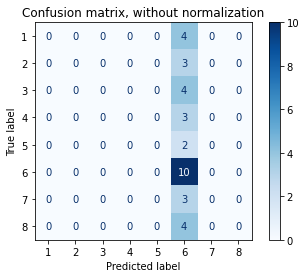

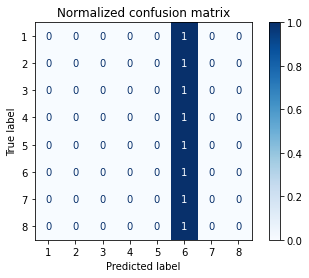

In [134]:

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model_svc,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [125]:
y_test.value_counts()

target
6         10
1          4
3          4
8          4
2          3
4          3
7          3
5          2
dtype: int64

In [126]:
y_pred

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [127]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         4
           4       0.09      1.00      0.17         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         4

    accuracy                           0.09        33
   macro avg       0.01      0.12      0.02        33
weighted avg       0.01      0.09      0.02        33



C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
ydata

array([2, 2, 2, 5, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 8, 8, 4, 7, 5, 6, 4, 6,
       6, 7, 4, 6, 9, 4, 5, 3, 6, 1, 4, 6, 6, 4, 6, 4, 8, 8, 3, 1, 6, 6,
       6, 3, 8, 6, 8, 8, 6, 7, 7, 8, 7, 7, 6, 6, 1, 1, 1, 1, 1, 1, 1, 6,
       1, 1, 7, 3, 5, 6, 4, 6, 5, 5, 4, 2, 1, 4, 3, 6, 6, 8, 8, 6, 6, 6,
       7, 6, 5, 8, 6, 7, 6, 3, 6, 5, 6, 3, 7, 6, 6, 6, 7, 8, 9, 8, 7, 6])

C:\Users\rmcgr\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[2 0 0 1 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0]
 [0 0 2 0 1 0 0 0 0]
 [0 0 0 1 1 1 0 0 0]
 [0 1 0 0 0 0 0 1 0]
 [1 0 0 1 2 3 2 1 0]
 [0 0 0 0 0 3 0 1 0]
 [0 0 0 1 0 0 0 3 0]
 [0 0 0 0 0 0 0 1 0]]
Normalized confusion matrix
[[0.67 0.   0.   0.33 0.   0.   0.   0.   0.  ]
 [0.67 0.33 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.67 0.   0.33 0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.33 0.33 0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.   0.   0.5  0.  ]
 [0.1  0.   0.   0.1  0.2  0.3  0.2  0.1  0.  ]
 [0.   0.   0.   0.   0.   0.75 0.   0.25 0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.75 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.  ]]


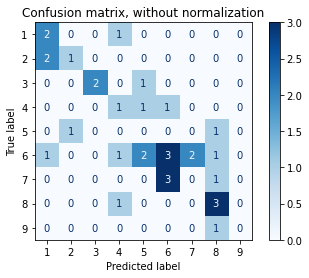

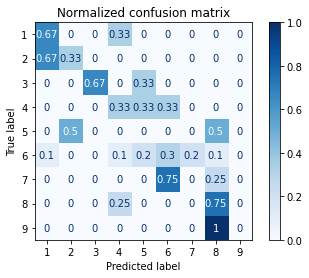

In [73]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# class_names = iris.target_names

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel="linear", C=0.01).fit(X_train, y_train)

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
#         display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
n_est = 300
rs = 1
maxd = 4

rng = np.random.RandomState(rs)
rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
print(rfrModel_1)
mdl = "abr"
str_model = f"rf_{abr}_{model_data_name}_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
n_est = 100
lr=0.1
rs = 1
maxd = 4
loss = 'squared_error'

rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
print(rfrModel_1)
mdl = "gbr"
str_model = f"rf_{mdl}_{model_data_name}_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
print(str_model)

In [ ]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

In [ ]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

In [ ]:
num_bf_selection = 0.01
df_var = dfsort[dfsort['n'] > num_bf_selection]

In [ ]:
column_var = df_var.band.tolist()

In [ ]:
column_var.insert(0, 'target')

In [ ]:
select_model_data = df_ml[column_var]

In [ ]:
df_corr = select_model_data.corr()
df_corr.to_csv(os.path.join(model_outputs, f'{str_model}_feature_imp_n_{num_bf_selection}_.csv'), index=False)
df_corr

In [ ]:
variable_imp_list = dfsort.band.to_list()

In [ ]:
variable_imp_list

### Run same model and same peramiters with selected features

In [ ]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = select_model_data.iloc[:, 1:].astype('float32')
ydata1 = select_model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

In [ ]:
if mdl == "abr":
    
    rng = np.random.RandomState(rs)
    rfrModel_1 = abr(dtr(max_depth=maxd), n_estimators=n_est, random_state=rng)
    str_model = f"rf_abr_{model_data_name}_slc_feat_n_est_{n_est}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)


elif mdl== gbr:
    rfrModel_1 = gbr(n_estimators=n_est, learning_rate=lr, max_depth=maxd, random_state=1, loss=loss)
    str_model = f"rf_gbr_{model_data_name}_slc_feat_n_est_{n_est}_lr{lr}_{loss}_rs_{rs}_maxd_{maxd}_{date_time_str}"
    print(str_model)
else:
    pass
        

In [ ]:
np.nan_to_num(X_1)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [ ]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

In [ ]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult
r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
# print(r2)
# print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
# print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
# print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed target')

plt.xlabel('Predicted target')

# 1 for 1 line
#adding text inside the plot
plt.text(100, 33000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(100, 30000, f'$MSE = {mse}$', fontsize = 12)
plt.text(100, 27000, f'$n = {len(y_1)}$', fontsize = 12)


plt.plot(x, y, color = 'r')

plot_out = os.path.join(model_outputs, f'{str_model}_select_feat_plot.jpg')
plt.savefig(plot_out,dpi=600)# save out your figure to a pdf 
print(f"plot saved to: {plot_out}")


In [ ]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

plt.show()
plot_out = os.path.join(model_outputs, f'{str_model}_select_features_feature_importance_plot.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

### Predict the selected model on the test data

In [ ]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [ ]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))


r2 = round(rfrLCHM.score(X_1, y_1), 2)
mse = round(np.mean((y_1 - rfrLCHM.predict(X_1))**2), 2)
rmse = round(np.sqrt(np.mean((y2_predict - y_2) ** 2)), 2)
bias = round(np.mean(y_2) - np.mean(y2_predict), 2)

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1,40000)
plt.ylim(-1, 40000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$n = {len(y_1)}$', fontsize = 12)

plt.plot(x, y, color = 'r')
plot_out = os.path.join(model_outputs, f'{str_model}_test_data.jpg')
fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()

In [ ]:
str_model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = y2_predict
y = y_2

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]

print(x)
print(y)
print(z)
# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=0.8, edgecolor='')

# # data for the 1 for 1 line
# a = [-1,25]
# b = [-1,25]

# #sets the limits of the axis
# plt.xlim(-1,25)
# plt.ylim(-1,25)
# plt.ylabel('Observed mean CHM')
# plt.xlabel('Predicted mean CHM')
# # 1 for 1 line
# ax.plot(a, b, color = 'black')

# plt.show()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [ ]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

pkl_out = os.path.join(model_outputs, f'rf_model_{str_model}')


with open(pkl_out, 'wb') as f:
    pickle.dump(rfrLCHM, f)

## Load in unseen data here

In [ ]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model
new_data = select_model_data
# df = pd.read_csv(csv_file, header=0)
# df.shape 

In [ ]:
c_list = new_data.columns.tolist()
c_list

In [ ]:
#df1 = df[(df['comp'] == 'l57')]
df1 = new_data[(new_data['target'] > 0.01)]
df1.dropna(inplace=True)
print (df1.shape)

In [ ]:
df1.columns

In [ ]:
column_var

In [ ]:
df1[column_var].info()

In [ ]:
df1

In [ ]:
xdata2 = df1[column_var].astype('float32')
xdata2.drop("target", axis=1, inplace=True)

ydata1 = df1[['target']].astype('float32')

ydata2 = ydata1.values

ydata = ydata2.ravel()

print(len(ydata1))

In [ ]:
xdata2

In [ ]:
with open(pkl_out, 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))

r2 = round(rf.score(xdata2, ydata), 2)
mse = round(np.mean((ydata - rf.predict(xdata2))** 2), 2)
rmse = round(np.sqrt(np.mean((predicted - ydata) ** 2)), 2)
exp_var = round(explained_variance_score(ydata, predicted), 2)
bias = round(np.mean(ydata) - np.mean(predicted), 2)

# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

#adding text inside the plot
plt.text(300, 37000, f'$R^2 = {r2}$', fontsize = 12)
plt.text(300, 35000, f'$MSE = {mse}$', fontsize = 12)
plt.text(300, 33000, f'$RMSE = {mse}$', fontsize = 12)
plt.text(300, 31000, f'$Bias = {bias}$', fontsize = 12)
plt.text(300, 29000, f'$Var = {exp_var}$', fontsize = 12)
plt.text(300, 27000, f'$n = {len(y_1)}$', fontsize = 12)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')

plot_out = os.path.join(model_outputs, f'{str_model}_unseen_data.jpg')

fig.savefig(plot_out,dpi=600)# save out your figure to a pdf 

plt.show()